Here we will list all statistical plots shown in the Lecture notes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Total income vs Loan Amount

In [2]:
df1 = pd.read_csv('loan50.csv')

In [14]:
df1[["total_income", "loan_amount"]].head(10)

,total_income,loan_amount
0,59000,22000
1,60000,6000
2,75000,25000
3,75000,6000
4,254000,25000
5,67000,6400
6,28800,3000
7,80000,14500
8,34000,10000
9,192000,18500


In [16]:
def calculate_descriptive_stats(dataframe, columns):
    """
    Calculate descriptive statistics for specified columns in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names for which statistics should be calculated.

    Returns:
    pd.DataFrame: A DataFrame containing descriptive statistics for the specified columns.
    """

    # Select the specified columns from the DataFrame
    selected_data = dataframe[columns]

    # Calculate statistics
    stats = {
        'Mean': selected_data.mean(),
        'Median': selected_data.median(),
        'Std Deviation': selected_data.std(),
        'Variance': selected_data.var(),
        'Mode': selected_data.mode().iloc[0]  # Calculate the mode and select the first mode if multiple modes exist
    }

    # Calculate percentiles (25th, 50th, and 75th percentiles)
    percentiles = selected_data.quantile([0.25, 0.50, 0.75])

    # Create a DataFrame to store the results
    result_df = pd.DataFrame(stats)
    result_df['25th Percentile'] = percentiles.loc[0.25]
    result_df['50th Percentile'] = percentiles.loc[0.50]
    result_df['75th Percentile'] = percentiles.loc[0.75]

    return result_df

In [17]:
selected_columns = ["total_income", "loan_amount"]
result_statistics = calculate_descriptive_stats(df1, selected_columns)
print(result_statistics)

                   Mean   Median  Std Deviation      Variance     Mode  \
total_income  105220.56  78750.0   68141.967716  4.643328e+09  34000.0   
loan_amount    17083.00  15500.0   10455.456343  1.093166e+08   6000.0   

              25th Percentile  50th Percentile  75th Percentile  
total_income          60000.0          78750.0         119000.0  
loan_amount            7125.0          15500.0          24000.0  


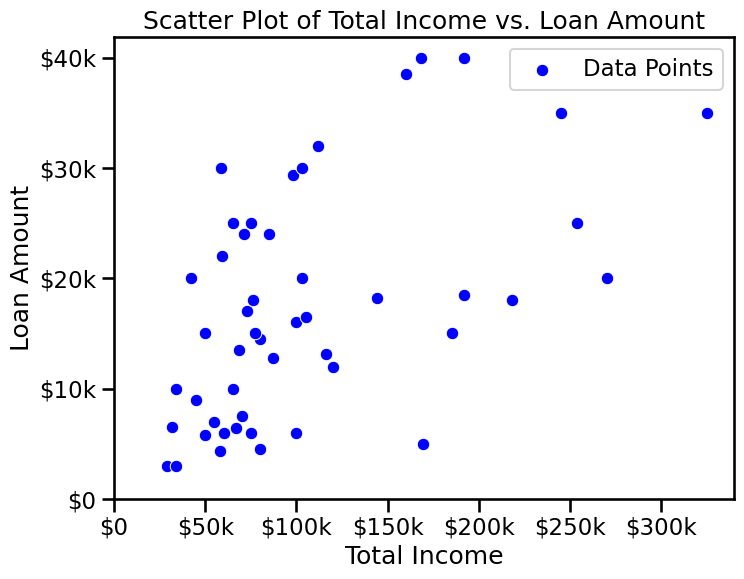

In [15]:
# Set the Seaborn style
sns.set_context("talk")

# Create a scatter plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x="total_income", y="loan_amount",marker='o', color='blue', label='Data Points')

# Set x and y axis labels
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')

# Set axis limits
# Set custom x-axis and y-axis tick labels
plt.xticks([0, 50000, 100000, 150000, 200000, 250000, 300000], ['$0', '$50k', '$100k', '$150k', '$200k', '$250k', '$300k'])
plt.yticks([0, 10000, 20000, 30000, 40000], ['$0', '$10k', '$20k', '$30k', '$40k'])

# Add title
plt.title('Scatter Plot of Total Income vs. Loan Amount')

# Save the plot to a file (e.g., PNG format)
plt.savefig('Total_Income_vs_Loan_Amount.png')

# Show the plot
plt.legend()
plt.show()
